In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [212]:
NUM_BET = 500
INITIAL_EQUITY = 100
NUM_RUNS = 100

In [287]:
WIN_PROB = 0.9
# LOSS_PROB = 1 - WIN_PROB
STAKE = 1
WIN_AMOUNT = 0.15
LOSS_AMOUNT = -STAKE

In [288]:
mcdf = pd.DataFrame()

for run in range(0, NUM_RUNS):
    df = pd.DataFrame(columns=['wl','equity'])
    df.wl = np.random.choice([WIN_AMOUNT, LOSS_AMOUNT], size=(NUM_BET,), p=[WIN_PROB, 1-WIN_PROB])
    df['equity'] = df.wl.cumsum() + INITIAL_EQUITY
    mcdf[str(run)] = df.equity.astype(float)

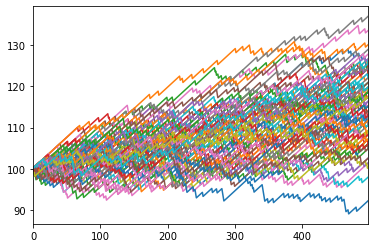

In [289]:
ax = mcdf.plot(legend=False)

In [226]:
mcdf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.15,100.15,100.15,100.15,100.15,99.00,100.15,100.15,100.15,100.15,...,100.15,99.00,99.00,100.15,100.15,100.15,100.15,99.00,100.15,99.00
1,100.30,100.30,99.15,99.15,100.30,98.00,99.15,99.15,99.15,100.30,...,100.30,99.15,99.15,99.15,100.30,100.30,99.15,99.15,100.30,99.15
2,100.45,100.45,98.15,98.15,99.30,98.15,99.30,99.30,98.15,100.45,...,100.45,98.15,99.30,99.30,100.45,99.30,98.15,98.15,100.45,99.30
3,99.45,99.45,98.30,97.15,98.30,98.30,98.30,98.30,98.30,100.60,...,99.45,98.30,99.45,99.45,100.60,99.45,98.30,98.30,99.45,99.45
4,98.45,99.60,98.45,97.30,97.30,97.30,97.30,98.45,97.30,100.75,...,99.60,98.45,99.60,98.45,100.75,99.60,98.45,98.45,99.60,98.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27.20,41.00,45.60,38.70,57.10,31.80,27.20,32.95,7.65,31.80,...,45.60,29.50,49.05,46.75,46.75,35.25,54.80,27.20,28.35,30.65
496,26.20,41.15,44.60,37.70,57.25,31.95,27.35,31.95,7.80,31.95,...,44.60,29.65,48.05,46.90,46.90,35.40,54.95,27.35,28.50,30.80
497,26.35,40.15,44.75,37.85,57.40,30.95,27.50,32.10,7.95,32.10,...,44.75,29.80,48.20,47.05,47.05,35.55,55.10,27.50,28.65,30.95
498,26.50,40.30,44.90,38.00,56.40,31.10,27.65,32.25,8.10,32.25,...,44.90,28.80,48.35,47.20,46.05,35.70,55.25,27.65,27.65,31.10


In [196]:
# fa tante volte montecarlo e raccoglie le stat dei risultati finali (i.e. l'equity finale)
# ogni colonna sono le stat riassuntive di NUM_RUNS

NUM_SIMULATIONS = 10
sdf = pd.DataFrame()
for sim in range(0, NUM_SIMULATIONS):

    mcdf = pd.DataFrame()

    for run in range(0, NUM_RUNS):
        df = pd.DataFrame(columns=['wl','equity'])
        df.wl = np.random.choice([WIN_AMOUNT, LOSS_AMOUNT], size=(NUM_BET,), p=[WIN_PROB, 1-WIN_PROB])
        df['equity'] = df.wl.cumsum() + INITIAL_EQUITY
        mcdf[str(run)] = df.equity.astype(float)
        
    sdf=pd.concat([sdf,mcdf[-1:].T.describe()], axis=1) # stat di tutti i ris finali

sdf

,499,499,499,499,499,499,499,499,499,499
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,193.486000,189.637500,190.583500,195.571500,192.067000,190.540500,191.959500,195.055500,196.109000,190.970500
std,23.896332,21.913802,27.196781,24.217695,23.636729,21.465344,23.544248,22.908593,21.771102,22.494773
min,133.200000,137.500000,126.750000,141.800000,128.900000,126.750000,137.500000,131.050000,122.450000,135.350000
25%,178.350000,173.512500,171.900000,178.350000,176.200000,176.200000,176.200000,180.500000,186.412500,178.350000
50%,193.400000,192.325000,189.100000,193.400000,191.250000,190.175000,189.100000,196.625000,197.700000,189.100000
75%,208.450000,204.687500,206.300000,210.600000,208.450000,206.837500,206.837500,210.600000,208.450000,206.300000
max,247.150000,249.300000,264.350000,283.700000,249.300000,236.400000,270.800000,251.450000,253.600000,251.450000


In [22]:
from ipywidgets import *

def plot_func(num_runs):
    ax = mcdf.iloc[:,0:num_runs].plot(legend = False)

interact(plot_func, num_runs=widgets.IntSlider(value=10, 
                                               min=10,
                                               max=NUM_RUNS,
                                              step=1))

interactive(children=(IntSlider(value=10, description='num_runs', min=10), Output()), _dom_classes=('widget-in…

<function __main__.plot_func(num_runs)>

In [53]:
x=np.random.choice([WIN_AMOUNT, LOSS_AMOUNT], size=(100,), p=[WIN_PROB, 1-WIN_PROB])
unique, counts = np.unique(x, return_counts=True)
print(unique, counts)

[-1.   1.1] [20 80]
